<a href="https://colab.research.google.com/github/morgan-nutto/Customer-Classification/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [30]:
# Reading and manipulating data
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Other functions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

Mount google drive

In [31]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import data

In [32]:
#Import dataset
data = pd.read_csv('/content/drive/MyDrive/MIT-WK5-Classification_and_Hypothesis_Testing/ExtraaLearn.csv')


# Overview of Data

In [33]:
#Look at first few rows
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [34]:
# Look at last few rows
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [35]:
# Get shape of data
data.shape

(4612, 15)

In [36]:
# Get null count and data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f



*   There are 15 columns and 4612 rows
*   There are no null values
*   age, web visits, time spent on web, and status are integers
*   page views per visit is a float
*   Rest are categorical

In [37]:
# Get number of unique values of each column
data.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


Dropping unique values column

In [38]:
# Drop ID column as it wont add anything to the analysis
data.drop(columns = 'ID', inplace = True)

In [39]:
# Get statistical summary of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


*   Website visits has some outliers at the right end as the 75th percentile is 5 and the max is 30 - should be explored further
* page views per visit also has some right side outliers as the 75th percentile is 3.7 and the max is 18.4
*   The target variable - status is unbalanced as most values are 0

Check count of unique categories of important categorical variables

In [40]:
# Making a list of all catrgorical variables
cat_col=['current_occupation','first_interaction', 'profile_completed', 'last_activity']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts(1))
    print('-'*50)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
--------------------------------------------------


*   Most leads are professionals ~57%, and few are students ~12%
*   Most leads have their first interaction with ExtraaLearn through their website ~55%
*   Most leads have either high profile completion ~49% or medium profile completion ~49%. Very few leads have low profile completion ~2%
*   Most leads have their last interaction with ExtraaLearn through email ~49%

In [41]:
# Make a copy of the dataset
df = data.copy()

# Exploratory Data Analysis

## Univariate Analysis

In [42]:
#Function to plot variables using histplots and box plots

def hist_box(data_frame, col, figsize=(15, 5), kde = False, bins = None):
  #create sub plots; one histogram, one box plot
  fig, (box, hist) = plt.subplots(
      nrows = 2,
      sharex = True, # both sub plots share x axis
      gridspec_kw ={"height_ratios": (0.25, 0.75)},
      figsize = figsize
  )

  sns.boxplot(data = data_frame, x = col, ax = box, showmeans = True, color = 'violet')
  sns.histplot(data = data_frame, x = col, kde = kde, ax = hist)
  hist.axvline(data_frame[col].mean(), color = "green", linestyle = "--")   # Green line marks mean of distribution
  hist.axvline(data_frame[col].median(), color = "black", linestyle = "-")  # Black line marks median of distribution

np.float64(46.20121422376409)

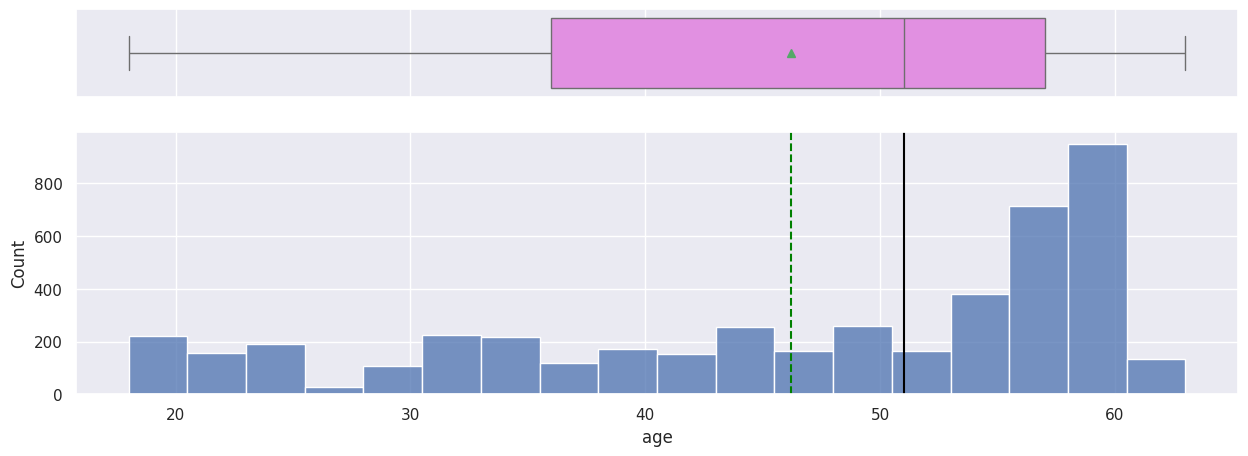

In [43]:
# Distribution of age
display(df.age.mean())
hist_box(df,'age')

* Age is left skewed with most leads in the 45-60 age bracket.
* this skew suggests that current marketing is highly effective at reaching established professionals but not so effective at reaching students.


np.float64(3.566782307025152)

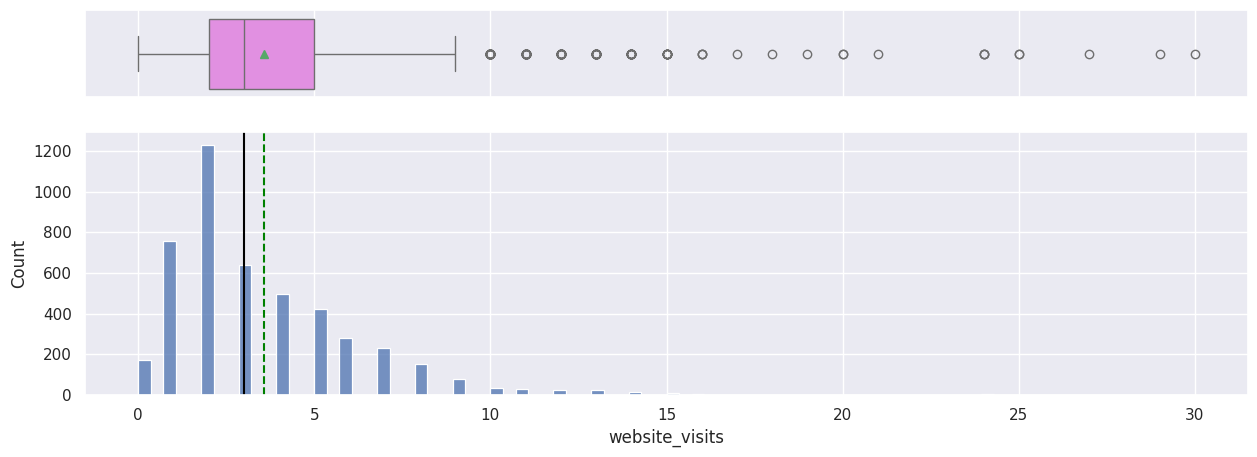

In [44]:
# Distribution of total web visits
display(df.website_visits.mean())
hist_box(df,'website_visits')

* Web_visits is heavily right skewed with most leads making < 4 website visits.
* Few leads make over 10 visits and very few make over 15 visits
* few website visits could highlight possible issues with website navigation and retention

Time_spent_on_website Analysis

np.float64(724.0112749349523)

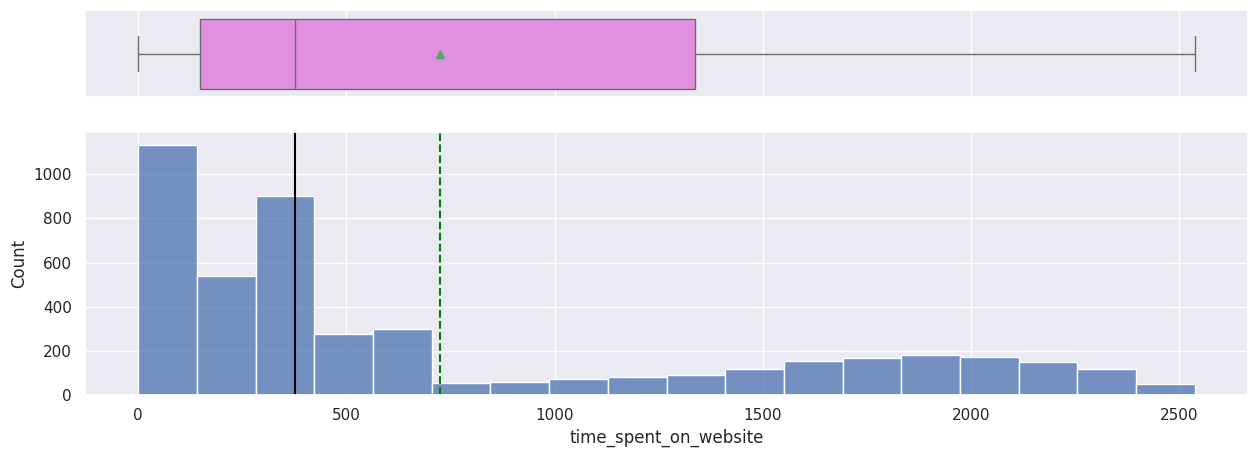

In [45]:
# Distribution of time spent on website in seconds
display(df.time_spent_on_website.mean())
hist_box(df,'time_spent_on_website')

 * Seconds is difficult to analyze so this should be converted into minutes

In [46]:
#Convert Time spent on website from seconds to minutes

df['time_spent_on_website'] = df['time_spent_on_website'].apply(lambda x: x / 60)
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,27.316667,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,1.383333,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,5.500000,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,7.733333,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,10.000000,16.914,Email Activity,No,No,No,No,No,0


np.float64(12.066854582249206)

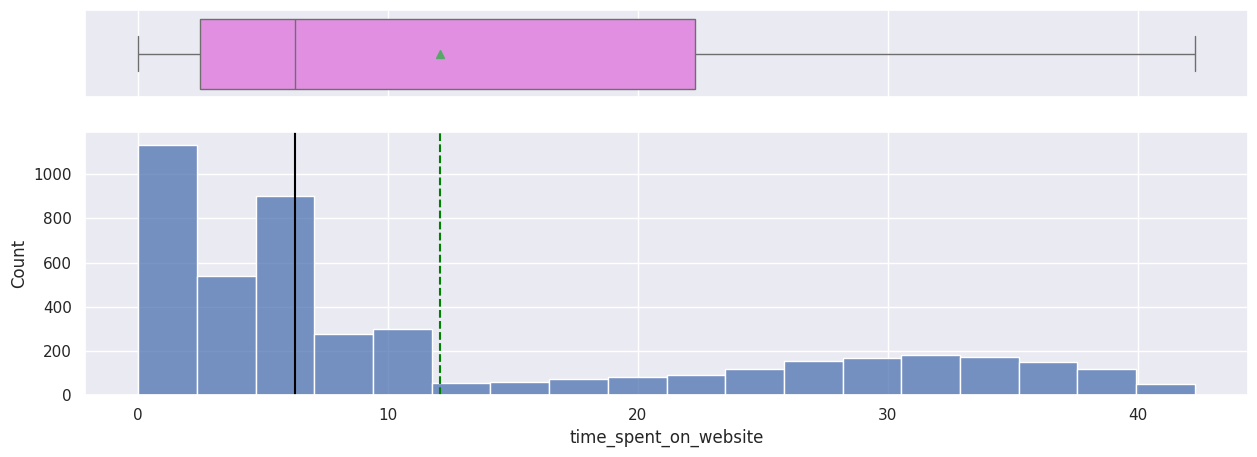

In [47]:
# Distribution of time spent on website in minutes
display(df.time_spent_on_website.mean())
hist_box(df,'time_spent_on_website')

* Time_spent_on_website is right skewed with most leads spending <= 12 minutes total on the website
* this aligns with total website visits, further suggesting low retention/interaction with the website

Page_views_per_visit analysis

np.float64(3.0261255420641806)

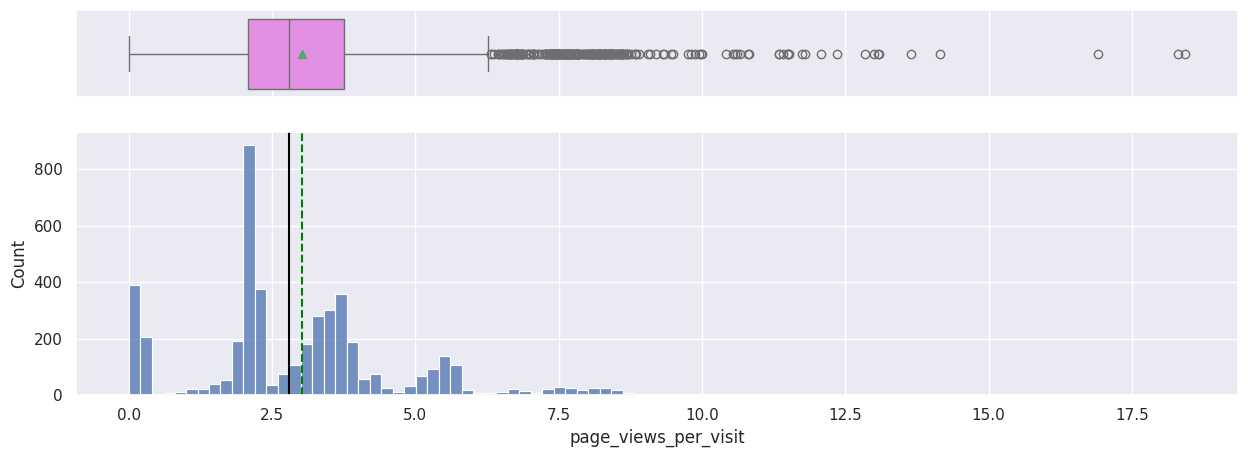

In [48]:
# Distribution of page views per visit
display(df.page_views_per_visit.mean())
hist_box(df,'page_views_per_visit')

* page visits can't be decimals so this should be converted into integers

In [49]:
# Round page_views_per_visit column
df['page_views_per_visit'] = df['page_views_per_visit'].astype(int)
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,27.316667,1,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,1.383333,0,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,5.500000,0,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,7.733333,2,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,10.000000,16,Email Activity,No,No,No,No,No,0


np.float64(2.641803989592368)

<Axes: xlabel='page_views_per_visit', ylabel='count'>

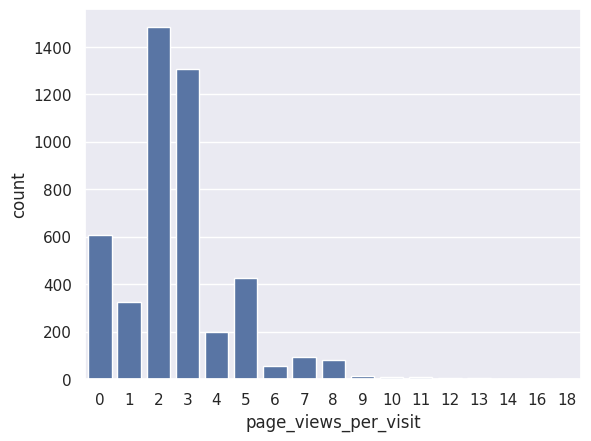

In [50]:
#corrected distribution of average page views per visit
display(df.page_views_per_visit.mean())
sns.countplot(data = df, x ='page_views_per_visit', )

* Page_views_per_visit is right skewed with most leads viewing <= 3 pages per visit.
* Few leads view > 6 pages per visit and very few view > 10 pages
* the concentration of leads viewing only 0-3 pages suggests many leads are not being successfully funneled deeper into the site to explore specific program details

In [51]:
# Removing outliers from page_views_per_page and website_visits

df.drop(index = df[df.page_views_per_visit > 9].index,inplace = True)
df.drop(index = df[df.website_visits > 15].index,inplace = True)

In [52]:
#Function to plot ad channels using bar plots

def bar_plot(data, col, perc = False, n = None):

    total = len(data[col])  # Length of the column
    count = data[col].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(fontsize = 15,rotation=45)
    ax = sns.countplot(
        data = data,
        x = col,
        palette = "Paired",
        order = data[col].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                       # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

,proportion
print_media_type1,
No,0.892075
Yes,0.107925


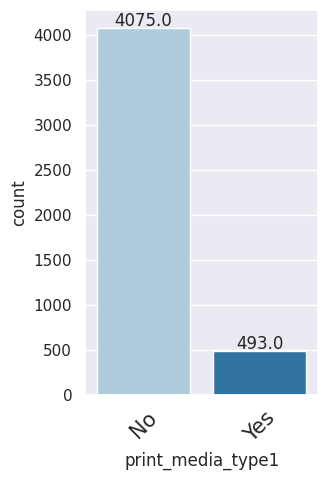

In [53]:
# Distribution of discovery through newspapers
display(df['print_media_type1'].value_counts(normalize = True))
bar_plot(df,'print_media_type1')

,proportion
print_media_type2,
No,0.949212
Yes,0.050788


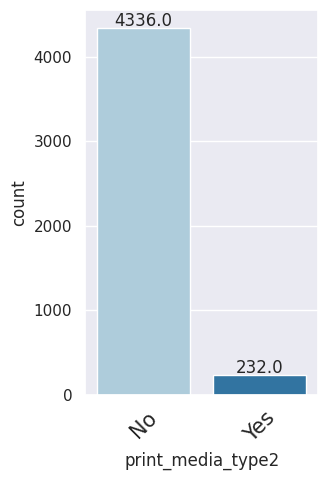

In [54]:
#Distribution of discovery through Magazines
display(df['print_media_type2'].value_counts(normalize = True))
bar_plot(df,'print_media_type2')

,proportion
digital_media,
No,0.886165
Yes,0.113835


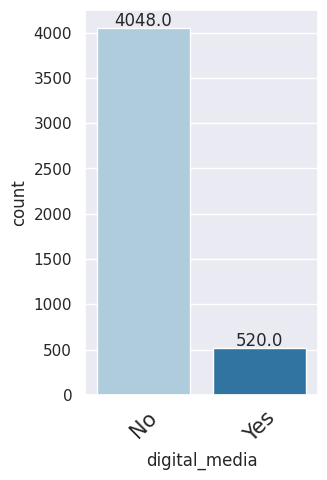

In [55]:
# Distribution of discovery through digital media
display(df['digital_media'].value_counts(normalize = True))
bar_plot(df,'digital_media')

,proportion
educational_channels,
No,0.847417
Yes,0.152583


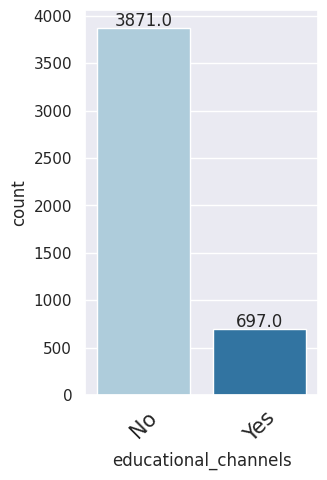

In [56]:
# Distribution of Discovery through Educational channels
display(df['educational_channels'].value_counts(normalize = True))
bar_plot(df,'educational_channels')

,proportion
referral,
No,0.97986
Yes,0.02014


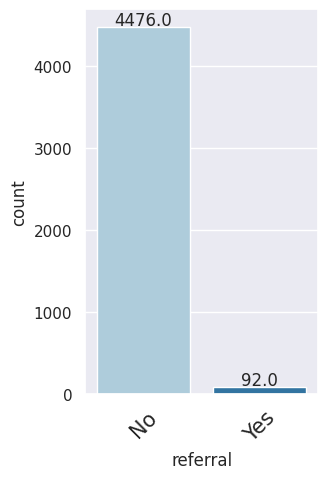

In [57]:
# Distribution of Discovery through Referral
display(df['referral'].value_counts(normalize = True))
bar_plot(df,'referral')

* Very few leads discover ExtraaLearn Through ads of any channel, but Educational channels bring in the most leads ~15% followed by newspapers and digital media ~11%


,proportion
status,
0,0.701839
1,0.298161


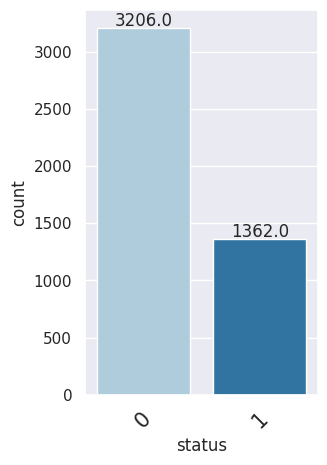

In [58]:
#Distribution of status ( Conversion to enrollment)
display(df['status'].value_counts(normalize = True))
bar_plot(df,'status')

* Only ~30% of leads are converted into paid customers


## Bivariate Analysis

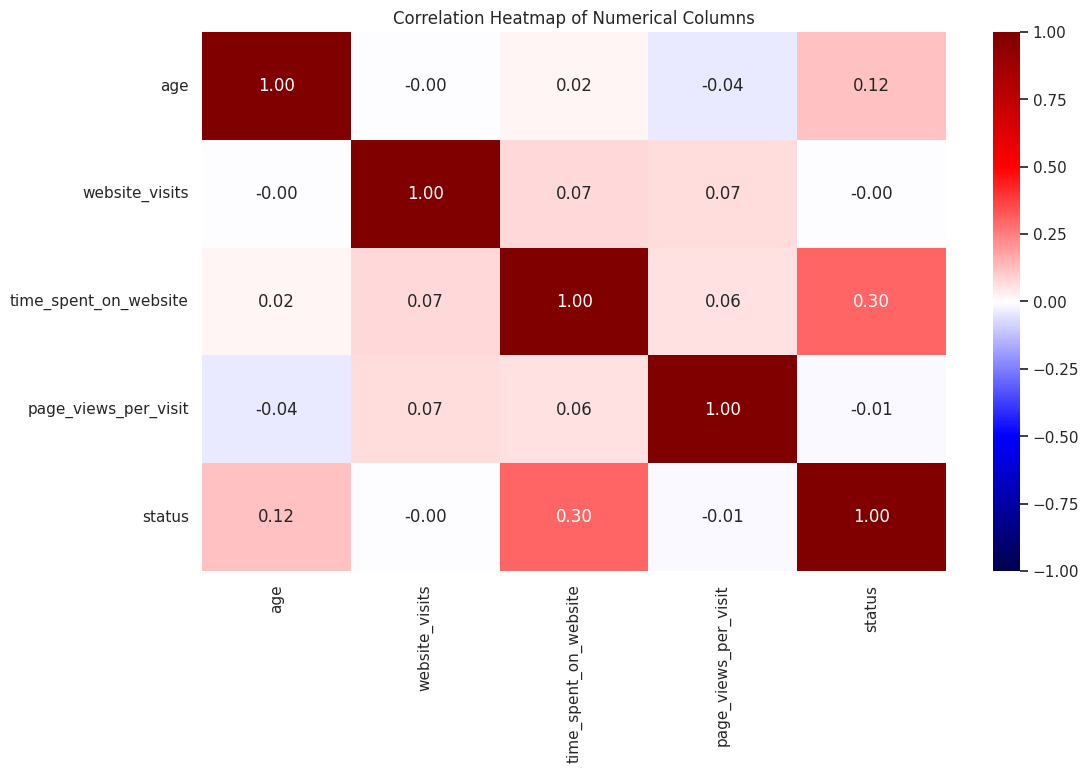

In [59]:
# Create heat map of numerical variables
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, cmap='seismic', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

* time_spent_on_website has the strongest positive correlation with the target variable (status) which would explain why most leads don't convert to paid customers- Most leads spend less than 10 minutes total on the website

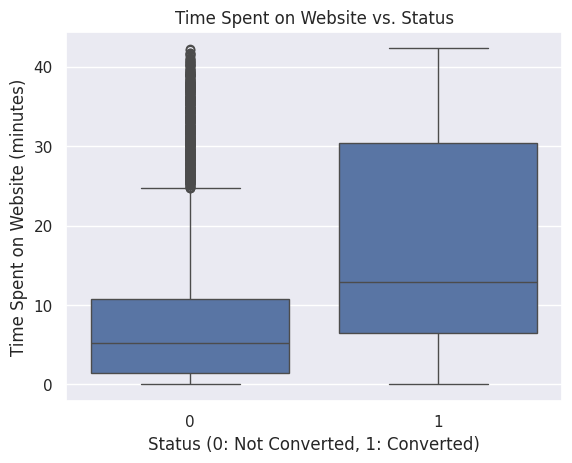

In [60]:
# plot relationship between status and time_spent_on_website
sns.boxplot(data=df, x='status', y='time_spent_on_website')
plt.title('Time Spent on Website vs. Status')
plt.xlabel('Status (0: Not Converted, 1: Converted)')
plt.ylabel('Time Spent on Website (minutes)')
plt.show()

* most leads that didn't convert to enrollment spent less time on the website
* most leads that did convert to enrollement spent more time on the website.

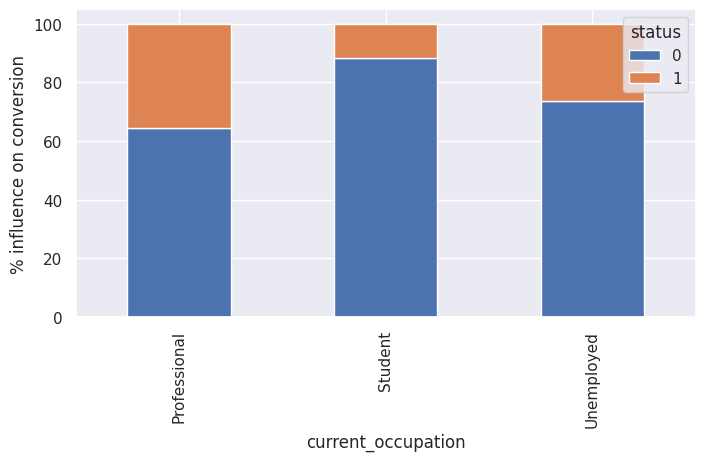

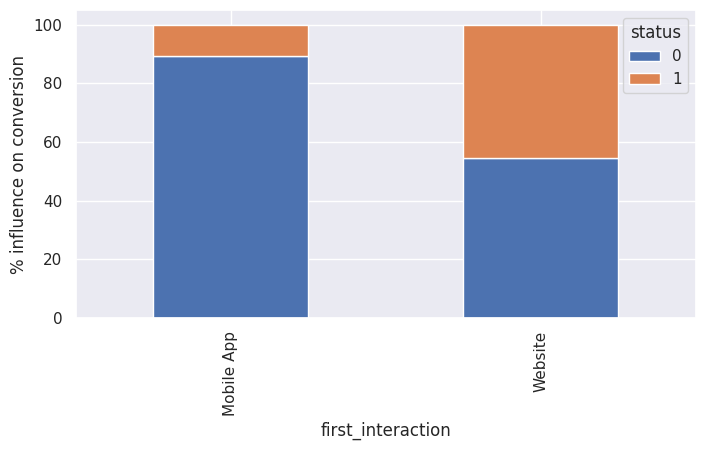

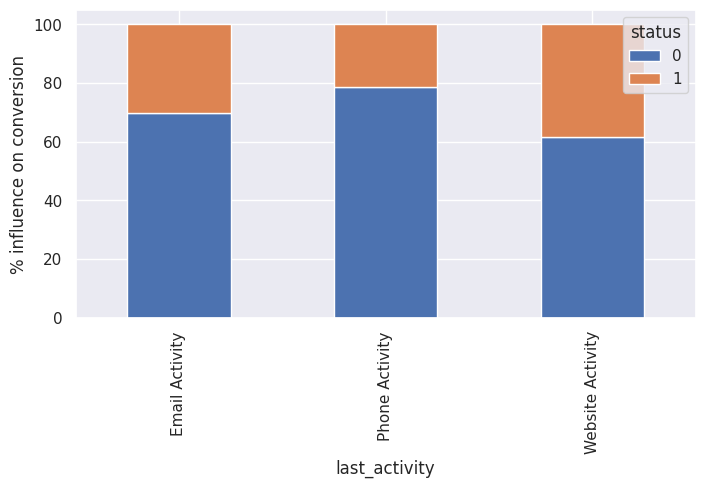

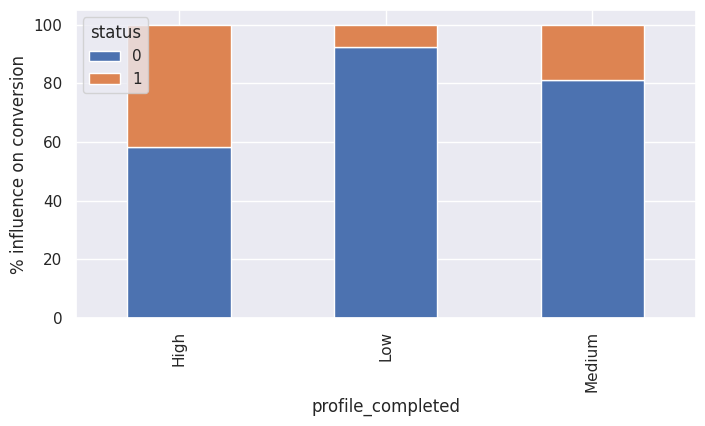

In [61]:
#Check if categorical variables affect status
cat_cols = ['current_occupation', 'first_interaction','last_activity','profile_completed']

for i in cat_cols:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('% influence on conversion')

*   Professional leads have the highest conversion rate followed by unemployed leads highlighting the effectiveness of marketing on professionals compared to students
*   First and last interaction through the website has the highest conversion rate suggesting marketing through the website is effective at converting leads compared to other ad channels
*   Profiles with higher profile completion have higher rates of conversion

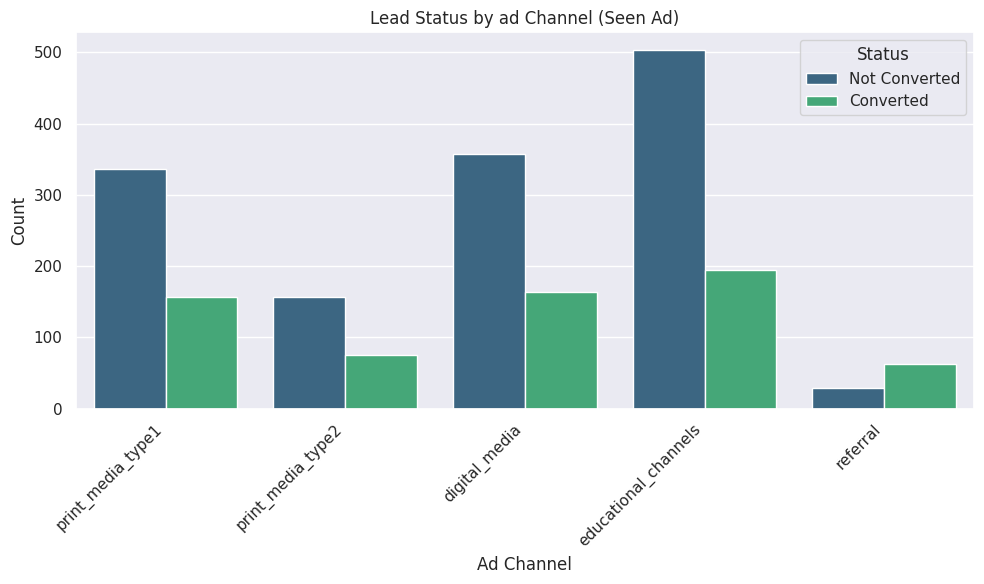

Conversion Rate (Status=1) for Leads who saw the Ad:
ad_channel
referral                68.478261
print_media_type2       32.327586
print_media_type1       31.845842
digital_media           31.346154
educational_channels    27.833572
Name: status, dtype: float64


In [62]:
#Check which ad channel affects status


#Create a list of ad channels
ad_channel = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

#convert 'Yes' to 1 and 'No to 0
for i in ad_channel:
  df[i] = (df[i] == 'Yes').astype(int)


#flatten ad channel values of each record into their own rows, along with respective status
melted_df = df.melt(id_vars='status', value_vars=ad_channel, var_name='ad_channel', value_name='seen_ad')

seen_ad_df = melted_df[melted_df['seen_ad'] == 1]       # Filter for rows where the ad was seen (1)

# Create bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=seen_ad_df, x='ad_channel', hue='status', palette='viridis')
plt.title('Lead Status by ad Channel (Seen Ad)')
plt.xlabel('Ad Channel')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status', labels=['Not Converted', 'Converted'])
plt.tight_layout()
plt.show()


# Calculate the rate of conversion for each ad channel
conversion_rate_by_channel = seen_ad_df.groupby('ad_channel')['status'].mean()

# Convert to percentages and format for clarity
print("Conversion Rate (Status=1) for Leads who saw the Ad:")
print((conversion_rate_by_channel * 100).sort_values(ascending=False))


*   Educational channels have the highest total number of seen ads and conversions, but has the lowest rate of conversion at ~28%
*   Referrals have the lowest total number of seen ads and conversions, but has the highest rate of conversion at ~68%



# Data Preprocessing for models

In [63]:
# Create dummy variables for categorical variables
cols_to_get_dummies = ['current_occupation', 'first_interaction', 'last_activity', 'profile_completed']

prepped_df = pd.get_dummies(
    df,
    columns=cols_to_get_dummies,
    drop_first=True
)

prepped_df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,last_activity_Phone Activity,last_activity_Website Activity,profile_completed_Low,profile_completed_Medium
0,57,7,27.316667,1,1,0,1,0,0,1,False,True,True,False,True,False,False
1,56,2,1.383333,0,0,0,0,1,0,0,False,False,False,False,True,False,True
2,52,3,5.500000,0,0,0,1,0,0,0,False,False,True,False,True,False,True
3,53,4,7.733333,2,0,0,0,0,0,1,False,True,True,False,True,False,False
5,50,4,3.533333,5,0,0,0,1,0,0,False,True,False,True,False,False,False


In [64]:
# Separate target variable y and features X
X = prepped_df.drop('status', axis=1)
y = prepped_df['status']

In [65]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

# Print the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (3197, 16)
X_test shape: (1371, 16)


# Building Models

## Create metric funtion

In [66]:
# Creating metric function to visualize confusion matrix
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Logistical Regression Model

In [67]:
# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2244
           1       0.75      0.66      0.70       953

    accuracy                           0.83      3197
   macro avg       0.81      0.78      0.79      3197
weighted avg       0.83      0.83      0.83      3197



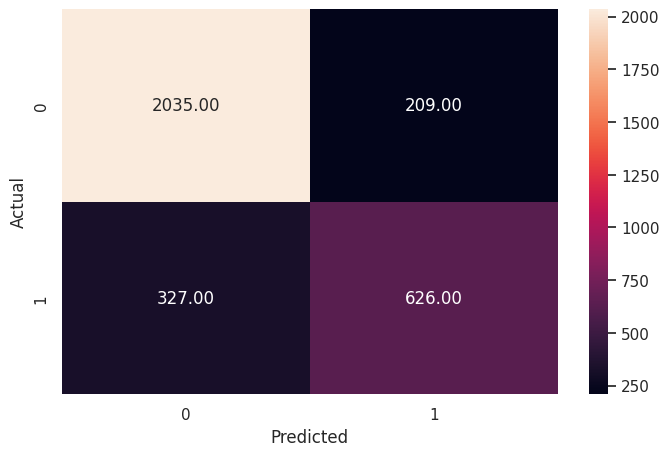

In [68]:
# Check performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

* This model can predict coverted leads well on training data with a recall score of 66% which is acceptable but could be improved
* Precision score is good, but we are looking to maximize recall.

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       962
           1       0.70      0.65      0.67       409

    accuracy                           0.81      1371
   macro avg       0.78      0.76      0.77      1371
weighted avg       0.81      0.81      0.81      1371



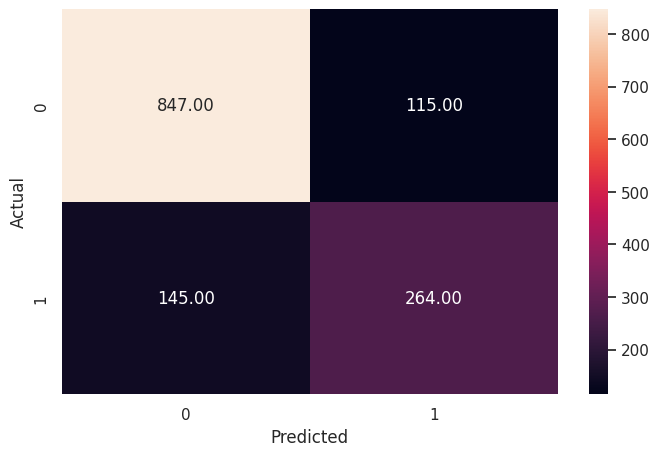

In [69]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

* The model has a slightly lower recall(65%) and precision(70%) on test data which can be improved by finding optimal threshold through the recall-precision curve

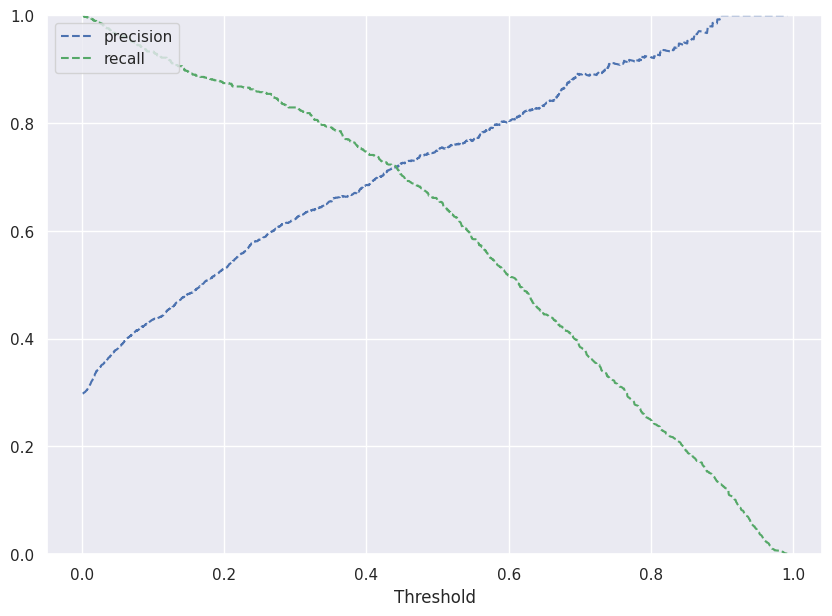

In [70]:
#Visualize the Precision-Recall Curve

# probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

* Recall should be prioritized to ensure we catch most leads that are likely to convert so we will use a slightly lower threshold for better recall

In [71]:
# Setting the optimal threshold
optimal_threshold = 0.35

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2244
           1       0.65      0.79      0.72       953

    accuracy                           0.81      3197
   macro avg       0.78      0.81      0.79      3197
weighted avg       0.83      0.81      0.82      3197



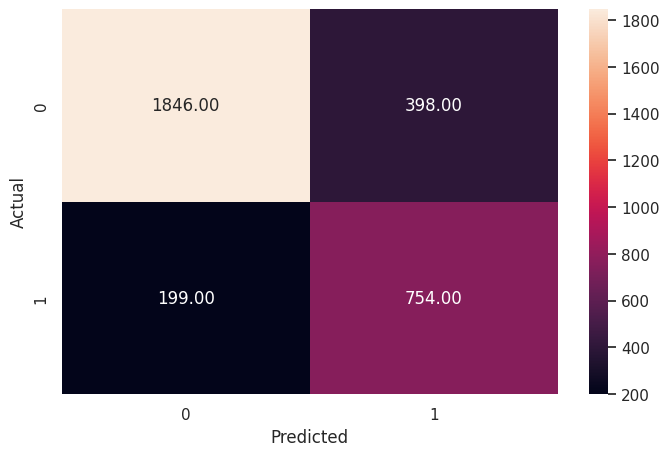

In [72]:
# run optimal threshold on training set
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

*  Recall score increased by 14% while perception decreased by 10%

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       962
           1       0.62      0.80      0.70       409

    accuracy                           0.79      1371
   macro avg       0.76      0.79      0.77      1371
weighted avg       0.82      0.79      0.80      1371



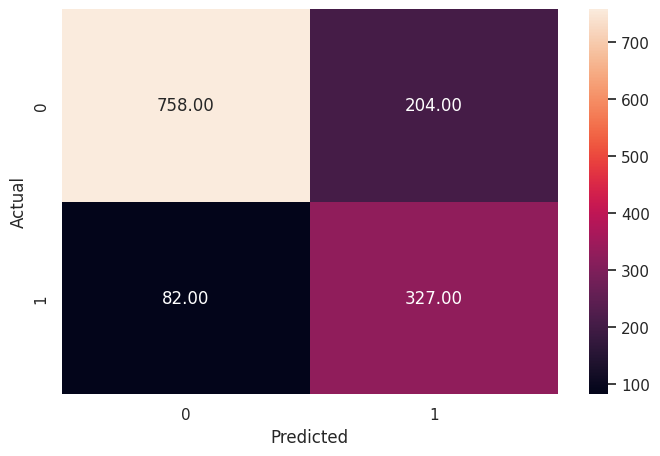

In [73]:
#run optimal threshold on testing set
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

* Recall score after finding optimal threshold is much better at 80%
* f1 score shows a good balance between recall and precision at 70%
* We should consider other models before chossing logistical regression

## Decision Tree Model

In [74]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2244
           1       1.00      1.00      1.00       953

    accuracy                           1.00      3197
   macro avg       1.00      1.00      1.00      3197
weighted avg       1.00      1.00      1.00      3197



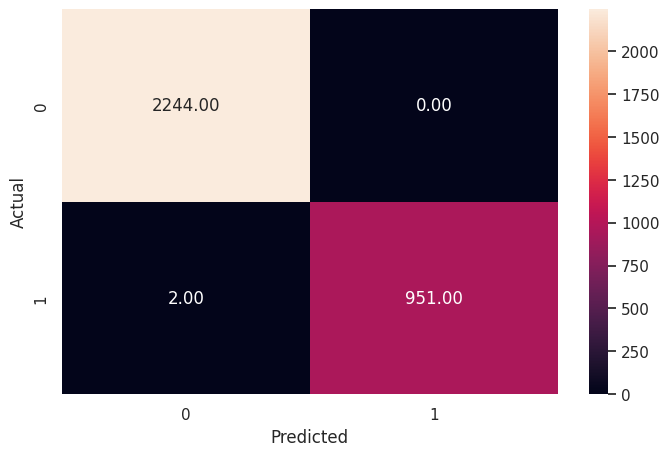

In [75]:
 # Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

* this model has performed very well on the training data, with almost zero error.
* This could be a sign of overfitting, if model doesn't perform this well on test data

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       962
           1       0.66      0.69      0.67       409

    accuracy                           0.80      1371
   macro avg       0.76      0.77      0.76      1371
weighted avg       0.80      0.80      0.80      1371



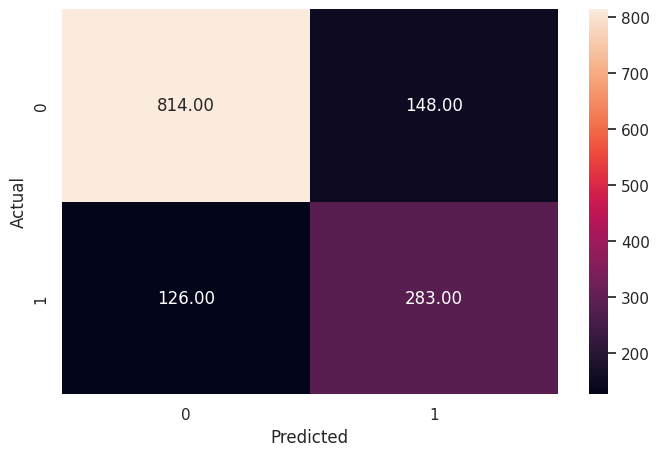

In [76]:
#Check performance on test data
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

* As expected, the model is overfitting. Recall and precision are acceptable but could be better with hyperparameter tuning
* So far, Logistical regression performs better

In [77]:
#Tune hyperparameters

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(21), max_leaf_nodes=50,
                       min_samples_split=30, random_state=1)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2244
           1       0.83      0.78      0.80       953

    accuracy                           0.89      3197
   macro avg       0.87      0.86      0.86      3197
weighted avg       0.89      0.89      0.89      3197



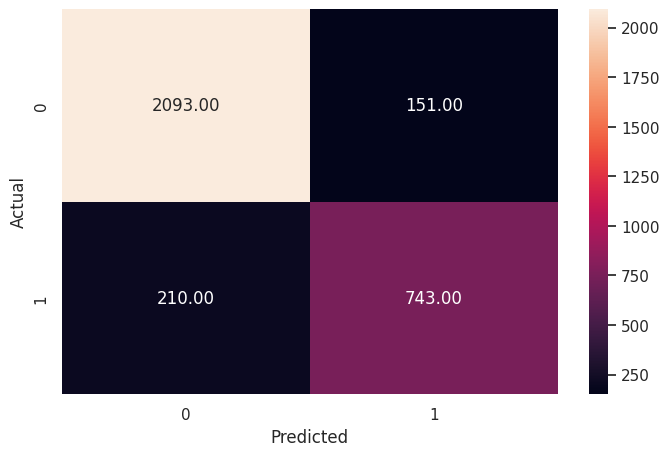

In [78]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

* After tuning we get a better score for recall (78%) and precision(83%) on training data

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       962
           1       0.77      0.72      0.74       409

    accuracy                           0.85      1371
   macro avg       0.83      0.81      0.82      1371
weighted avg       0.85      0.85      0.85      1371



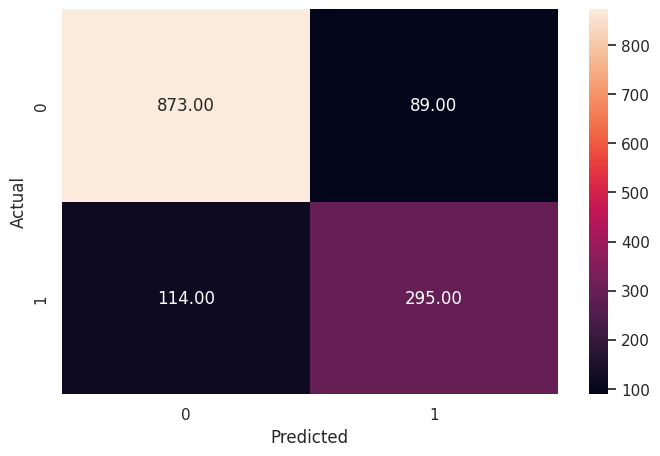

In [79]:
# Checking performance on the test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

* Recall and precision scores for test data are relatively close to training data scores which show less overfit and good generalization.
* Accuracy is 85% and f1 score is 74% which are good measurements of model performance
* Decision tree model has showed greater performance over logistical regression.

### Visualize tuned decision tree

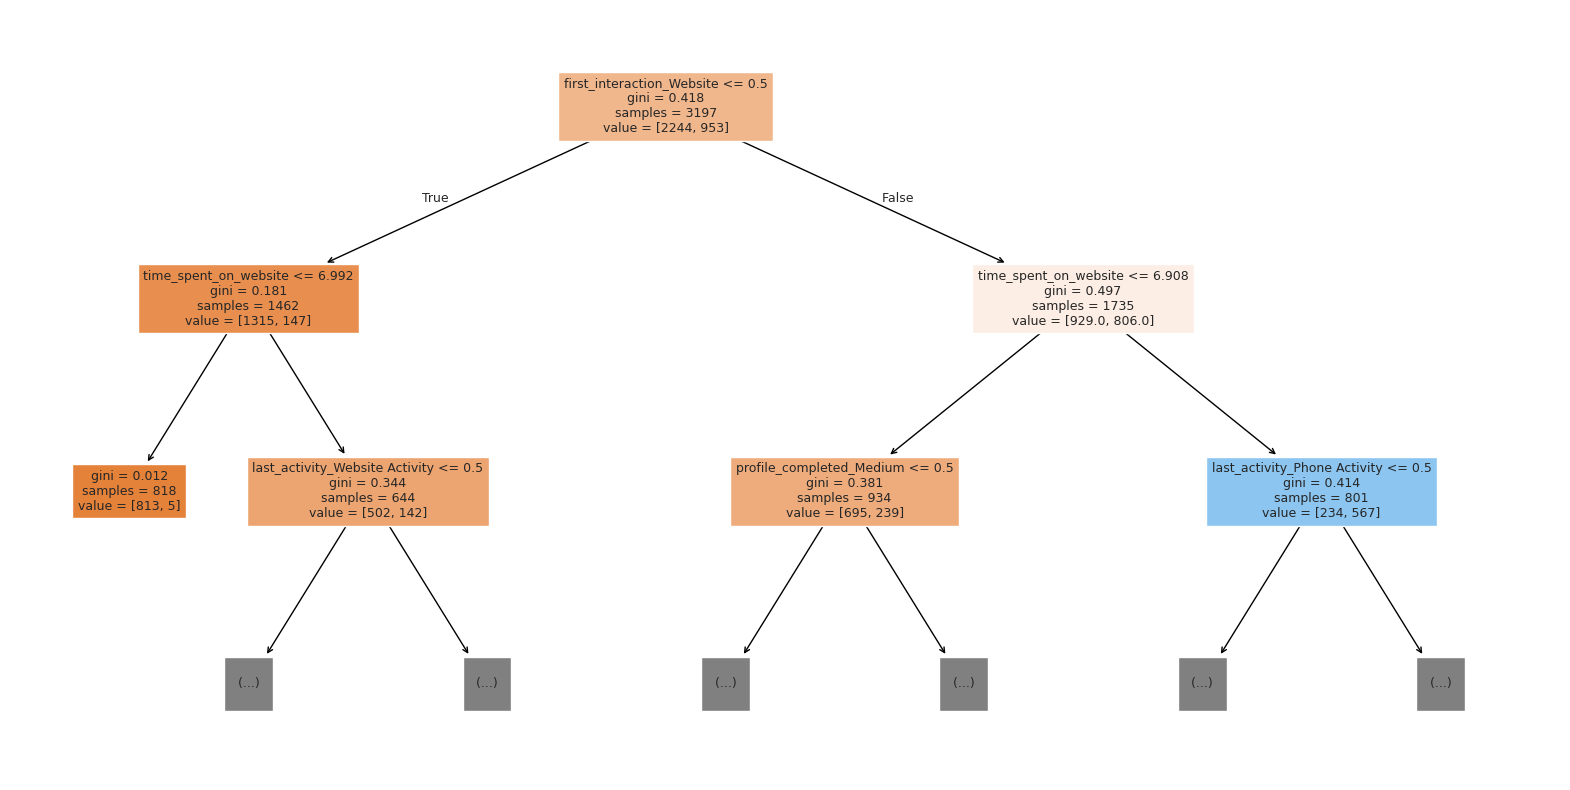

In [80]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

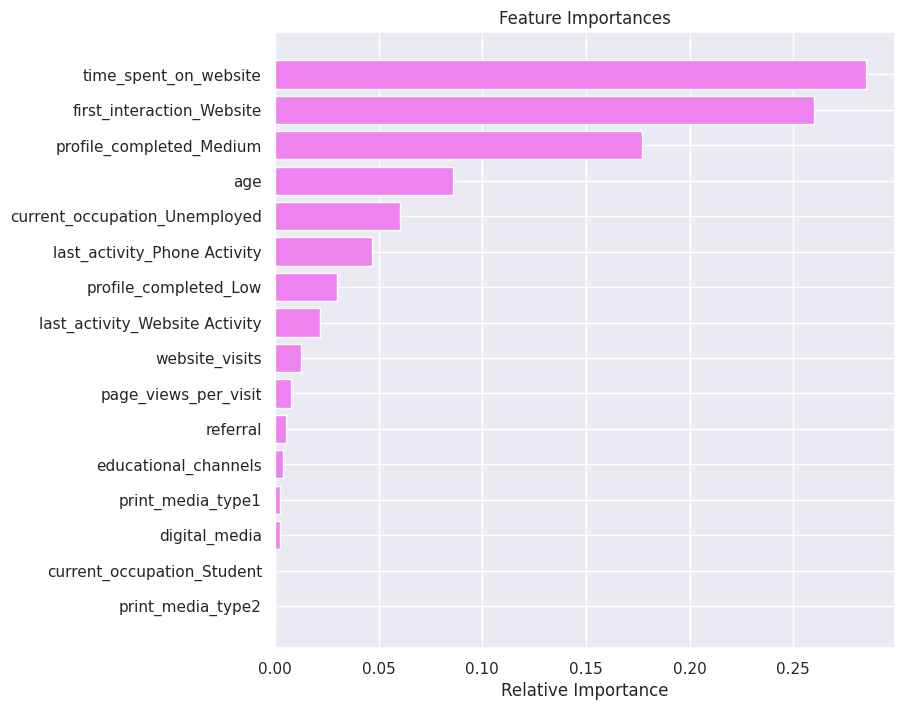

In [81]:
# Importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



*   Most important features are:

    1.   time spent on website
    2.   first interaction through website
    3.   and profile completion >= medium








## Random Forest Model

In [82]:
#Build random forest model
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2244
           1       1.00      1.00      1.00       953

    accuracy                           1.00      3197
   macro avg       1.00      1.00      1.00      3197
weighted avg       1.00      1.00      1.00      3197



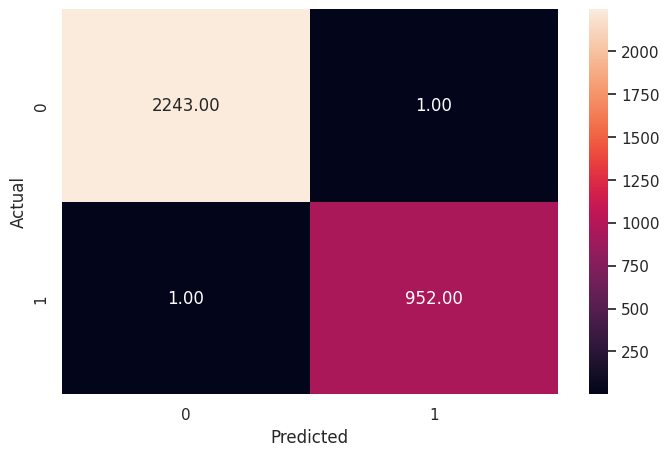

In [83]:
#Check performance on training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

* This model performs very well on the training data with almost zero error
* This could again be a sign of overfitting if the model doesn't perform as well on test data

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.80      0.70      0.75       409

    accuracy                           0.86      1371
   macro avg       0.84      0.81      0.82      1371
weighted avg       0.86      0.86      0.86      1371



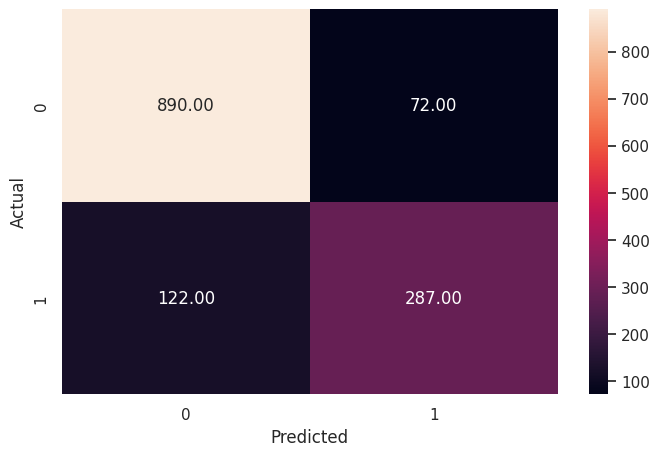

In [84]:
#Check performance on test data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

* This model is overfitting but still has acceptable precision and recall scores.
* This model also has a good f1 score which is already better than the decision tree model
* This model can be improved through tuning

In [85]:
# Choose the type of classifier.
estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [10, 20, 30],
    "max_leaf_nodes": [50, 100, 150],
    "min_samples_split": [20, 40, 60],
    "n_estimators": [100, 200]
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
tuned_rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
tuned_rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=100, min_samples_split=20,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2244
           1       0.85      0.76      0.81       953

    accuracy                           0.89      3197
   macro avg       0.88      0.85      0.87      3197
weighted avg       0.89      0.89      0.89      3197



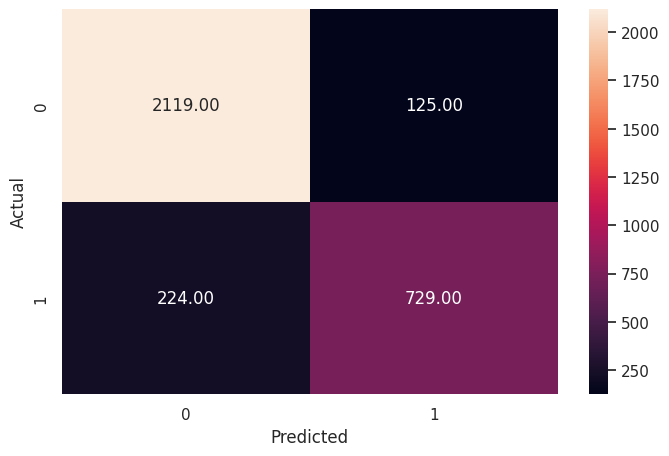

In [86]:
#Check performance on training data
y_pred_train_rf = tuned_rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.81      0.70      0.75       409

    accuracy                           0.86      1371
   macro avg       0.84      0.82      0.83      1371
weighted avg       0.86      0.86      0.86      1371



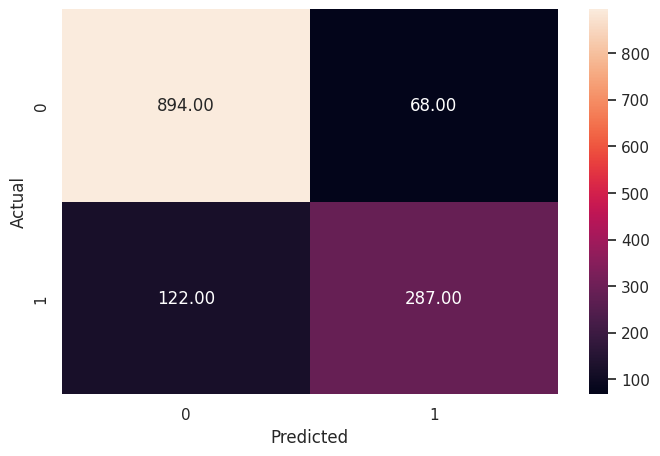

In [87]:
#Check performance on test data
y_pred_test_rf = tuned_rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

* recall and precision scores of test data are relatively close to training data, showing better generalization after tuning
* f1 score is great at 75%, which is slightly better than the decision tree model
* Accuracy is also slightly better than the decision tree model at 86%

 **The Random forest model is the best choice for predicting lead conversion**

<Axes: title={'center': 'Feature Importances'}, xlabel='Importance', ylabel='None'>

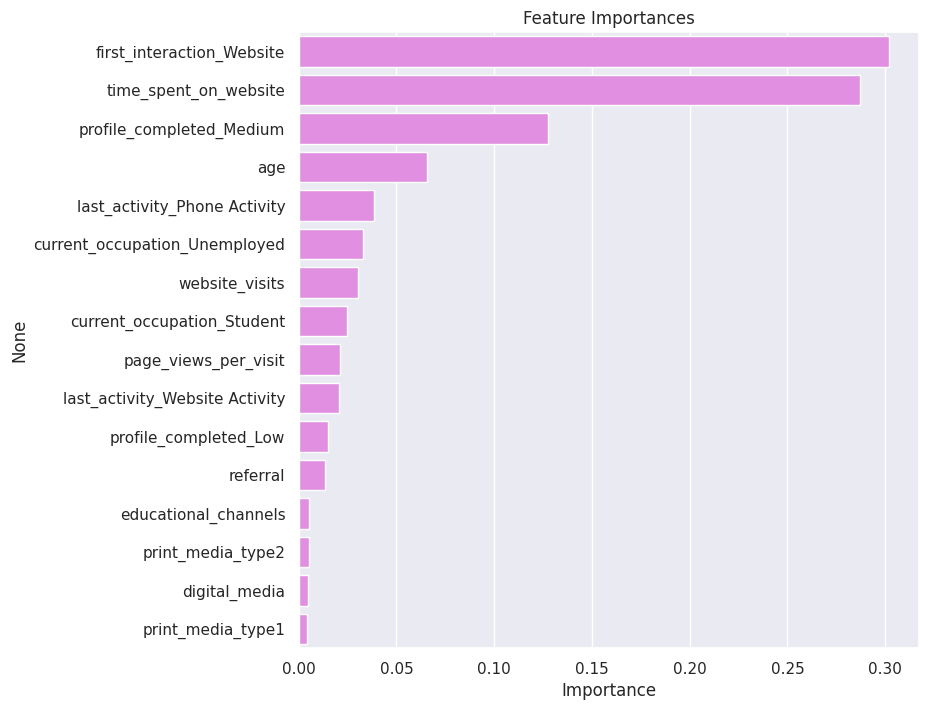

In [88]:
importances = tuned_rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

* The most important features are the same as the decision tree model, except first interaction through website has more importance than time spent on website.
* Profile completion >= medium is still the third most important but has a lower level of importance than in the decision tree model.
    

# Business Insights and Recommendations

## Converted lead Profile:


*   Leads who convert to paid customers are often engage with ExtraaLearn through the website starting from their first interaction.
*   These leads spend more time on the website and have profiles near complete.

## Insights:



### --Website Experience:

*   Ensure website is engaging and encourage longer browsing sessions, this could involve:
    *   Improving navigation and website speed
    *   Creating in-depth content (e.g. program syllabi, testimonials, etc.)
    *   Adding interactive elements (e.g. course demos, quizzes, etc.)
*   Allocate resources to drive more traffic to the website rather than the mobile app this would include:
    * Ensuring ad channels and emails link/lead to the website

### --Nurturing Incomplete Profiles

* create targeted campaigns to encourage leads to complete their profiles, this could involve:
    * Automated emails that offer incentives or guidance on how to complete their profile
    * Use pop-up reminders on app/website for incomplete profiles

### --Capitalize on high value ad channels

* create a referral program that incentivizes existing customers to bring in new leads. This could involve:
    * Offering discounts or rewards for the referring customer and the new lead

### --Follow ups on key interactions (website activity)

* Leads with recent website activity should be prioritized and should recieve immediate and personalized follow-up from a sales rep through email or a phone call, as these last interactions lead to higher conversion rates.

### --Student Market Opportunity

* Since the student demographic shows lower volume compared to the older professionals, consider using targeted campus outreach or entry-level certification ads to help balance the distribution

### -- Additional insights

* Low conversion rates may require re-evaluation of core offerings, pricing, or target audience.

